# Importing Required Libraries

In [45]:
import pandas as pd 
import numpy as np
import spacy
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from spacy import displacy

# loading spaCy and data extraction

In [46]:
nlp = spacy.load('en_core_web_lg')

In [47]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [48]:
input_doc1 = input("Enter the name of first document : ")
input_doc2 = input("Enter the name of second document : ")

Enter the name of first document : 1.txt
Enter the name of second document : 2.txt


In [49]:
document1 = open(input_doc1, 'r')
sentences1 = document1.read().split('.')[:-1]
#print("----------Document_1----------\n")
#print(sentences1)
document2 = open(input_doc2, 'r')
sentences2 = document2.read().split('.')[:-1]
#print("\n----------Document_2----------\n")
#print(sentences2)

In [50]:
#from scipy import spatial
#cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

# Analysis of Document1

In [51]:
text1=""
for i in sentences1:
    text1 = text1+i;
#text1

In [52]:
doc1 = nlp(text1)

In [53]:
displacy.render(doc1, style='ent', jupyter=True)

In [54]:
#for token in doc1:
#    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(token.text,token.idx,token.lemma_,token.is_punct,token.is_space,token.shape_,token.pos_,token.tag_))

# Analysis of Document2

In [55]:
text2=""
for i in sentences2:
    text2 = text2+i;
#text2

In [56]:
doc2 = nlp(text2)

In [57]:
displacy.render(doc2, style='ent', jupyter=True)

In [58]:
#for token in doc2:
#    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(token.text,token.idx,token.lemma_,token.is_punct,token.is_space,token.shape_,token.pos_,token.tag_))

# PD_Method

In [59]:
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

In [60]:
def source_target_relation_triple(sentence, k):
    source = ''
    target = ''
    relation = ''
    for token in sentence:
        print(token.text, "->", token.dep_)
        if token.dep_ != "punct":
            if isRelationCandidate(token):
                relation = relation + ' ' + token.lemma_
            if "subj" in token.dep_:
                source = source + ' ' + token.text
            if "obj" in token.dep_:
                target = target + ' ' + token.text
    print("Triple ", k, ": Source:", source, ", Relation:", relation, ", Target:", target)
    
    return (source.strip(), relation.strip(), target.strip())

In [61]:
triples1 = []
i = 1
k = 1
print( "---------------Document 1---------------" )
for sentence in sentences1:
    tokens = nlp(sentence)
    print("Sentence", i, ":", tokens )
    i = i + 1
    triples1.append(source_target_relation_triple(tokens, k))
    k = k +1

triples2 = []
j = 1
k = 1
print( "---------------Document 2---------------" )
for sentence in sentences2:
    tokens = nlp(sentence)
    print("Sentence", j, ":", tokens )
    j = j + 1;
    triples2.append(source_target_relation_triple(tokens, k))
    k = k + 1

---------------Document 1---------------
Sentence 1 : A good article (GA) is an article that meets a core set of editorial standards
A -> det
good -> amod
article -> nsubj
( -> punct
GA -> appos
) -> punct
is -> ROOT
an -> det
article -> attr
that -> nsubj
meets -> relcl
a -> det
core -> compound
set -> dobj
of -> prep
editorial -> amod
standards -> pobj
Triple  1 : Source:  article that , Relation:  good be article editorial , Target:  set standards
---------------Document 2---------------
Sentence 1 : A good article (GA) is an article that meets a core set of editorial standards
A -> det
good -> amod
article -> nsubj
( -> punct
GA -> appos
) -> punct
is -> ROOT
an -> det
article -> attr
that -> nsubj
meets -> relcl
a -> det
core -> compound
set -> dobj
of -> prep
editorial -> amod
standards -> pobj
Triple  1 : Source:  article that , Relation:  good be article editorial , Target:  set standards


In [62]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(14,14))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='green', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

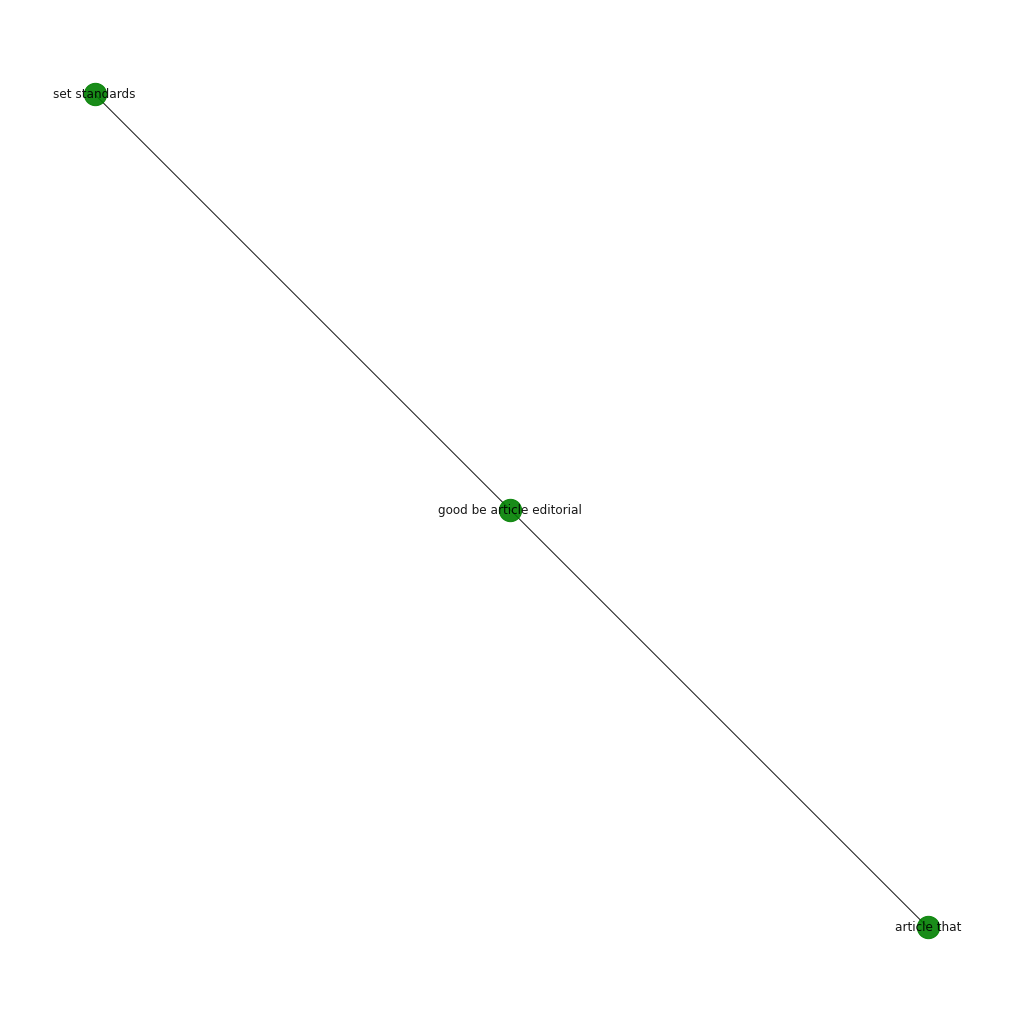

In [63]:
printGraph(triples1)

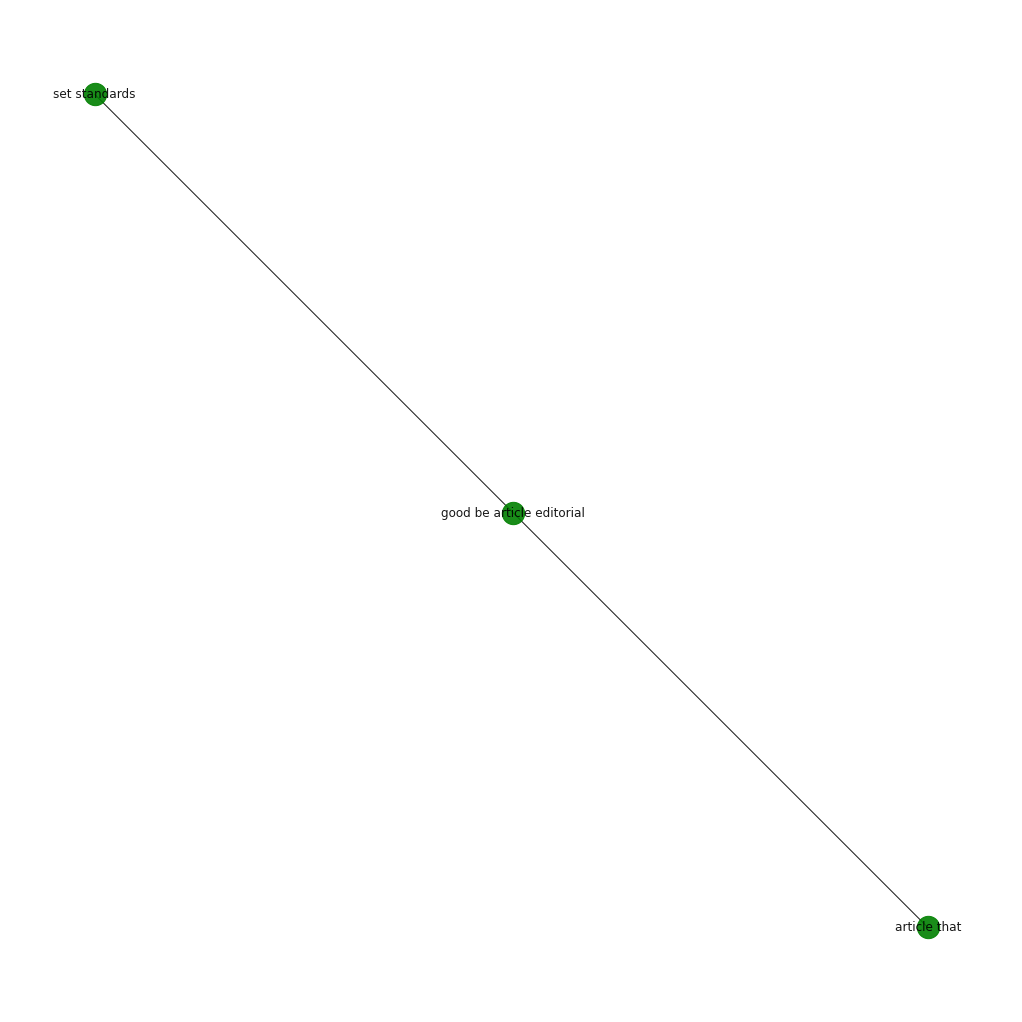

In [64]:
printGraph(triples2)

In [65]:
arr1 = ""
for i in range(0, len(triples1)):
  arr1 += triples1[i][0]
  arr1 += triples1[i][1]
  arr1 += triples1[i][2]

arr2 = ""
for i in range(0, len(triples2)):
  arr2 += triples2[i][0]
  arr2 += triples2[i][1]
  arr2 += triples2[i][2]

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([arr1,arr2])
similar = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print('%.3f'%(similar*100))

100.000
